# SCC-ICMC-USP - 1o. semestre de 2023
# SCC5871/MAI5025 - APRENDIZADO DE MÁQUINA
# **Exercício 5**

### Profa. Roseli A. F. Romero

### Monitor: Diogo Godoi

Nro do grupo: 5

### Alunos:
- Gabriel Bortoli (5378290)
- Lucas Maretti (6789752)


Considere o arquivo `houses_to_rent_v2.csv`. Esta base tem dados de imóveis para 5 cidades do Brasil. Esta base pode ser usada tanto pelo proprietário quanto pelo locatário. Pretende-se que um proprietario
tenha uma estimativa do preço que pode alugar seu imóvel, através de seus atributos. Por outro lado, pretende-se que um locatário possa estimar se o aluguel é condizente.

### **Questão 1**

 - Separe o conjunto em treinamento (80%) e teste (20%)
 - Verifique se é necessário um preprocessamento nos dados. Justifique o(s) tipo (s) de preprocessamento que foram feitos
 - Dica: O Sklearn não trabalha com atributos nominais em árvores de decisão

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

data = pd.read_csv('houses_to_rent_v2.csv', na_values='-')
# Vamos ignorar algumas colunas para simplificar o problema
data = data[['city', 'rooms', 'bathroom', 'parking spaces', 'furniture', 'fire insurance (R$)', 'rent amount (R$)']]
data = data.reset_index(drop=True)
print(data.shape[0])
print(data.info())

10692
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   rooms                10692 non-null  int64 
 2   bathroom             10692 non-null  int64 
 3   parking spaces       10692 non-null  int64 
 4   furniture            10692 non-null  object
 5   fire insurance (R$)  10692 non-null  int64 
 6   rent amount (R$)     10692 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 584.8+ KB
None


In [2]:
data.head()

,city,rooms,bathroom,parking spaces,furniture,fire insurance (R$),rent amount (R$)
0,São Paulo,2,1,1,furnished,42,3300
1,São Paulo,4,4,0,not furnished,63,4960
2,Porto Alegre,1,1,1,not furnished,41,2800
3,Porto Alegre,2,1,0,not furnished,17,1112
4,São Paulo,1,1,0,not furnished,11,800


In [3]:
data.columns

Index(['city', 'rooms', 'bathroom', 'parking spaces', 'furniture',
       'fire insurance (R$)', 'rent amount (R$)'],
      dtype='object')

### Precisamos fazer o encoding das variáveis city e furniture

In [4]:
data.city.unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [5]:
data.furniture.unique()

array(['furnished', 'not furnished'], dtype=object)

#### Como ambas as features não possuem grande cardinalidade, vamos usar one hot encoding para ambas

In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

encoded_features = encoder.fit_transform(data[['city', 'furniture']])

city_categories = encoder.categories_[0]
furniture_categories = encoder.categories_[1]

encoded_city_columns = [f'city_{category}' for category in city_categories]
encoded_furniture_columns = [f'furniture_{category}' for category in furniture_categories]

encoded_data = pd.DataFrame(encoded_features, columns=encoded_city_columns + encoded_furniture_columns)

In [7]:
encoded_data

,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo,furniture_furnished,furniture_not furnished
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
10687,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10688,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10689,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10690,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [8]:
# Concatenate the encoded_data with the original data DataFrame
df = pd.concat([data.drop(['city', 'furniture'], axis=1), encoded_data], axis=1)

In [9]:
df

,rooms,bathroom,parking spaces,fire insurance (R$),rent amount (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo,furniture_furnished,furniture_not furnished
0,2,1,1,42,3300,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,4,4,0,63,4960,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1,1,1,41,2800,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2,1,0,17,1112,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,1,0,11,800,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,2,1,1,22,1478,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10688,4,4,4,191,15000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10689,3,3,0,78,6000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
10690,2,2,2,155,12000,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [11]:
# Agora vamos colcoar todos os valores no intervalo de 0 a 1 com o MinMaxScaler:.
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
df[df.columns[:]] = data_scaled

# Vamos visualizar alguns registros e também ver algumas informações:
df.head(5)

,rooms,bathroom,parking spaces,fire insurance (R$),rent amount (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo,furniture_furnished,furniture_not furnished
0,0.083333,0.000000,0.083333,0.057864,0.063973,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.250000,0.333333,0.000000,0.089021,0.101235,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.000000,0.000000,0.083333,0.056380,0.052750,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.083333,0.000000,0.000000,0.020772,0.014860,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.000000,0.000000,0.000000,0.011869,0.007856,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Separando em treino e teste

In [12]:
target = 'rent amount (R$)'

X = df.drop(target, axis=1)  
y = df[target]

# Split the dataset into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Questão 2**
Verificar se existem dados nulos.

In [13]:
X.isna().sum()

rooms                      0
bathroom                   0
parking spaces             0
fire insurance (R$)        0
city_Belo Horizonte        0
city_Campinas              0
city_Porto Alegre          0
city_Rio de Janeiro        0
city_São Paulo             0
furniture_furnished        0
furniture_not furnished    0
dtype: int64

In [14]:
y.isna().sum()

0

### **Questão 3**
Verifique se existem outliers em relação ao valor do aluguel.
Crie um novo conjunto de dados, eliminando os outliers e considere esse novo conjunto para resolver os itens seguintes.

In [15]:
y_train.values

array([0.18069585, 0.04152637, 0.00112233, ..., 0.09539843, 0.04826038,
       0.05050505])

In [16]:
y_train.describe()

count    8553.000000
mean        0.077811
std         0.076973
min         0.000000
25%         0.024467
50%         0.050505
75%         0.102132
max         1.000000
Name: rent amount (R$), dtype: float64

<AxesSubplot: >

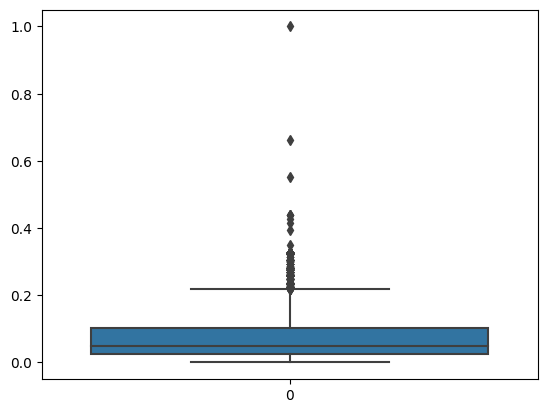

In [17]:
import seaborn as sns

sns.boxplot(y_train.values)

In [18]:
train = pd.concat([X_train, y_train], axis=1)

In [19]:
import numpy as np

Q1 = np.percentile(y, 25)
Q3 = np.percentile(y, 75)
IQR = Q3 - Q1

lower_cutoff = Q1 - 1.5 * IQR
upper_cutoff = Q3 + 1.5 * IQR

filtered_train = train[(train[target] >= lower_cutoff) & (train[target] <= upper_cutoff)]


In [20]:
X_train = filtered_train.drop(target, axis=1)  
y_train = filtered_train[target]

<AxesSubplot: >

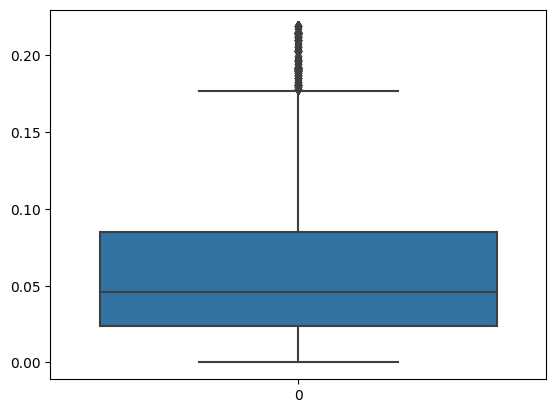

In [21]:
sns.boxplot(y_train.values)

### **Questão 5**

Treine um modelo de regressão com o método XGBoost, no conjunto de treino e calcule o Mean Squared Error (MSE) e o R2 no conjunto de teste.

- Dica: Utilize `xgboost.XGBRegressor`

In [27]:
import xgboost as xgb

# Create an instance of XGBRegressor
model_xgb = xgb.XGBRegressor()

# Train the model on the train set
model_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_xgb.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) * 1000:", round(mse*1000,2))
print("R2 Score:", round(r2,4))


Mean Squared Error (MSE) * 1000: 0.51
R2 Score: 0.9083


### **Questão 6**

Compare seus resultados com os modelos do exercício anterior.

- Dica: Cuidado para usar o mesmo train/test split em todos os modelos para que a comparação faça sentido. Para isso você pode utilizar o mesmo `random_state` na função `train_test_split` nos dois métodos.




In [28]:
from sklearn.tree import DecisionTreeRegressor
# Create an instance of XGBRegressor
model_dt = DecisionTreeRegressor()

# Train the model on the train set
model_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_dt.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) * 1000:", round(mse*1000,2))
print("R2 Score:", round(r2,4))

Mean Squared Error (MSE) * 1000: 0.52
R2 Score: 0.9067


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of XGBRegressor
model_rf = RandomForestRegressor()

# Train the model on the train set
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_rf.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) * 1000:", round(mse*1000,2))
print("R2 Score:", round(r2,4))


Mean Squared Error (MSE) * 1000: 0.53
R2 Score: 0.9049


#### Resposta: Os algoritmos de boosting tem um MSE melhor do que os algoritmos do exercício anterior. O que é esperado já que são variações dos algoritmos de DT e RF que utilizam técnicas de boosting para melhorar a performance.

### **Questão 7**

Verifique a importância de cada feature para o resultado final utilizando o melhor modelo. O que isso diz sobre o problema que estamos tentando resolver?

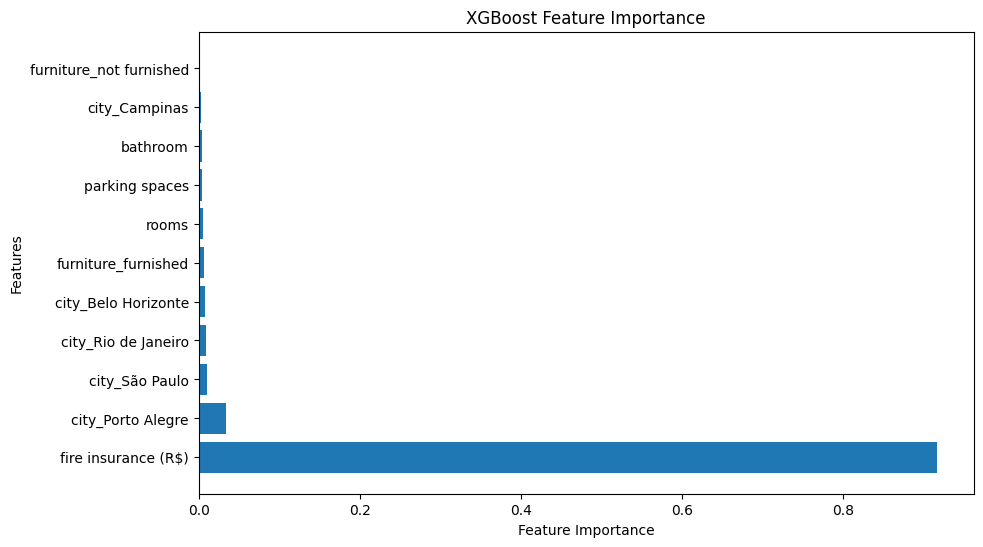

In [31]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importance = model_xgb.feature_importances_

feature_names = X_train.columns

# Sort feature importances in descending order
sorted_indices = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()


O custo de seguro contra incêndio tem um efeito altíssimo no preço final dos imóveis. São Paulo especificamente possui o seguro contra incêndio mais caro de todas as cidades. Além disso, é a cidade mais presente no dataset, o que pode explicar a valorização desta feature (ver gráficos abaixo)

<AxesSubplot: xlabel='city', ylabel='fire insurance (R$)'>

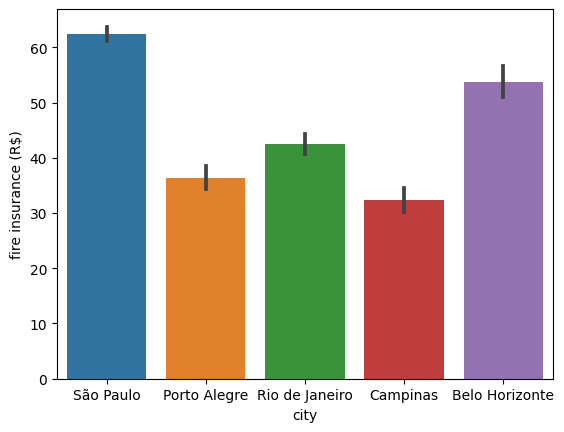

In [32]:
sns.barplot(data, x = 'city', y = 'fire insurance (R$)')

<AxesSubplot: xlabel='city', ylabel='count'>

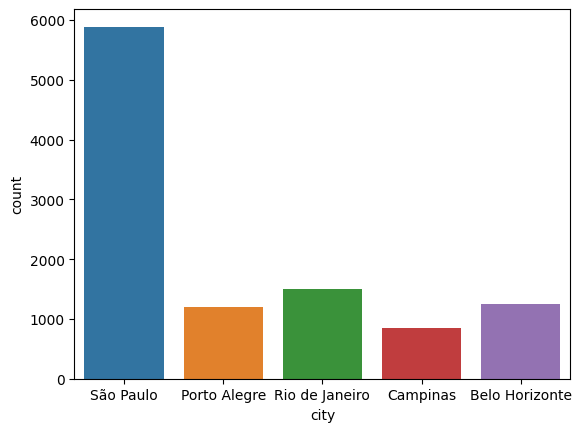

In [33]:
sns.countplot(data, x = 'city')